In [ ]:
import pandas as pd
import numpy as np

### Data

In [ ]:
import random

# Dictionary of team names with their variations
team_keywords = {
        'Alabama': ['alabama', 'crimson tide', 'bama', 'ua'],
        'Houston': ['houston', 'cougars', 'uh'],
        'Kansas': ['kansas', 'jayhawks', 'ku'],
        'Purdue': ['purdue', 'boilermakers'],
        'UCLA': ['ucla', 'bruins'],
        'University of Texas': ['longhorns', 'ut'],
        'Arizona': ['arizona', 'wildcats', 'u of a'],
        'Marquette': ['marquette', 'golden eagles'],
        'Baylor': ['baylor', 'bears'],
        'Gonzaga': ['gonzaga', 'bulldogs', 'zags'],
        'Kansas St.': ['kansas state', 'wildcats', 'ksu'],
        'Xavier': ['xavier', 'musketeers'],
        'UConn': ['uconn', 'huskies', 'connecticut'],
        'Tennessee': ['tennessee', 'volunteers', 'vols'],
        'Indiana': ['indiana', 'hoosiers'],
        'Virginia': ['virginia', 'cavaliers', 'uva'],
        'San Diego St.': ['san diego state', 'aztecs', 'sdsu', 'san diego'],
        'Duke': ['duke', 'blue devils'],
        'Saint Mary’s (CA)': ['saint mary\'s', 'gaels', 'smc'],
        'Miami (FL)': ['miami', 'hurricanes', 'the u', 'um'],
        'Iowa St.': ['iowa state', 'cyclones', 'isu'],
        'Creighton': ['creighton', 'bluejays'],
        'Kentucky': ['kentucky', 'wildcats', 'uk'],
        'TCU': ['tcu', 'horned frogs', 'texas christian'],
        'Texas A&M': ['texas a&m', 'aggies'],
        'Michigan St.': ['michigan state', 'spartans', 'msu'],
        'Missouri': ['missouri', 'tigers', 'mizzou'],
        'Northwestern': ['northwestern', 'wildcats', 'nu'],
        'Memphis': ['memphis', 'tigers'],
        'Arkansas': ['arkansas', 'razorbacks', 'hogs'],
        'Maryland': ['maryland', 'terrapins', 'terps'],
        'Iowa': ['iowa', 'hawkeyes'],
        'Florida Atlantic': ['florida atlantic', 'owls', 'fau'],
        'West Virginia': ['west virginia', 'mountaineers', 'wvu'],
        'Auburn': ['auburn', 'tigers'],
        'Illinois': ['illinois', 'fighting illini'],
        'Boise State': ['boise state', 'broncos'],
        'Penn State': ['penn state', 'nittany lions', 'psu'],
        'USC': ['southern california', 'trojans', 'usc'],
        'Utah State': ['utah state', 'aggies'],
        'NC State': ['nc state', 'wolfpack'],
        'Providence': ['providence', 'friars'],
        'Mississippi State': ['mississippi state', 'bulldogs', 'msu'],
        'Pittsburgh': ['pittsburgh', 'panthers', 'pitt'],
        'Arizona State': ['arizona state', 'sun devils', 'asu'],
        'Nevada': ['nevada', 'wolf pack'],
        'College of Charleston': ['college of charleston', 'cougars'],
        'Oral Roberts': ['oral roberts', 'golden eagles'],
        'Drake': ['drake', 'bulldogs'],
        'VCU': ['vcu', 'rams', 'virginia commonwealth'],
        'Kent State': ['kent state', 'golden flashes'],
        'Iowa': ['iowa', 'eagles'],
        'Furman': ['furman', 'paladins'],
        'Louisiana': ['louisiana', 'ragin' 'cajuns', 'ul lafayette'],
        'Kennesaw State': ['kennesaw state', 'owls'],
        'UC Santa Barbara': ['uc santa barbara', 'gauchos', 'ucsb'],
        'Grand Canyon': ['grand canyon', 'antelopes', 'gcu'],
        'Montana State': ['montana state', 'bobcats'],
        'Vermont': ['vermont', 'catamounts'],
        'Colgate': ['colgate', 'raiders'],
        'Princeton': ['princeton', 'tigers'],
        'UNC Asheville': ['unc asheville', 'bulldogs'],
        'Northern Kentucky': ['northern kentucky', 'norse', 'nkU'],
        'Howard': ['howard', 'bison'],
        'A&M-Corpus Christi': ['texas a&m-corpus christi', 'islanders', 'a&m'],
        'Texas Southern': ['texas southern', 'tigers', 'tsu'],
        'Southeast Missouri State': ['southeast missouri state', 'redhawks', 'semo'],
        'Fairleigh Dickinson': ['fairleigh dickinson', 'knights', 'fdu']

    }

#### Generate Textual Dataset from Structued Dataset

In [ ]:
import pandas as pd
chunk_size = 200000
# Load the datasets
teams = pd.read_csv('/content/MTeams.csv', usecols=['TeamID', 'TeamName'])
compact_results = pd.read_csv('/content/MNCAATourneyCompactResults.csv')
detailed_results = pd.read_csv('/content/MNCAATourneyDetailedResults.csv', chunksize=chunk_size, usecols=['Season', 'WTeamID', 'LTeamID'])
rankings = pd.read_csv('/content/MMasseyOrdinals_thru_Season2023_Day128.csv', usecols=['Season', 'TeamID', 'OrdinalRank', 'RankingDayNum'])

# Merge the team names into the results dataframes
compact_results = compact_results.merge(teams, left_on='WTeamID', right_on='TeamID', how='left')
compact_results.rename(columns={'TeamName': 'WTeamName'}, inplace=True)
compact_results = compact_results.merge(teams, left_on='LTeamID', right_on='TeamID', how='left')
compact_results.rename(columns={'TeamName': 'LTeamName'}, inplace=True)

# Generate textual descriptions from structured data
def create_description(row):
    return f"On {row['DayNum']}, {row['WTeamName']} defeated {row['LTeamName']} with a score of {row['WScore']}-{row['LScore']}."

descriptions = compact_results.apply(create_description, axis=1)

# Save or print the output
print(descriptions.head())

# Optionally, save to a file
descriptions.to_csv('/content/game_descriptions.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: '/content/MTeams.csv'

In [ ]:
import pandas as pd
import gc  # Garbage collector interface

def reduce_memory(df):
    for c in df.columns:
        if df[c].dtype == 'float64':
            df[c] = pd.to_numeric(df[c], downcast='float')
        elif df[c].dtype == 'int64':
            df[c] = pd.to_numeric(df[c], downcast='integer')
    return df

max_ranking_day_num = rankings['RankingDayNum'].max()
rankings_latest = rankings[rankings.RankingDayNum == max_ranking_day_num]
rankings_latest = reduce_memory(rankings_latest)
del rankings  # Free up memory
gc.collect()  # Explicit garbage collection

final_results = pd.DataFrame()

for detailed_results in detailed_results:
    detailed_results = reduce_memory(detailed_results)

    # Merge team names
    detailed_results = detailed_results.merge(teams, left_on='WTeamID', right_on='TeamID', how='left')
    detailed_results.rename(columns={'TeamName': 'WTeamName'}, inplace=True)
    detailed_results = detailed_results.merge(teams, left_on='LTeamID', right_on='TeamID', how='left', suffixes=('', '_L'))
    detailed_results.rename(columns={'TeamName': 'LTeamName'}, inplace=True)

    # Incorporate the latest rankings
    detailed_results = detailed_results.merge(rankings_latest, left_on=['Season', 'WTeamID'], right_on=['Season', 'TeamID'], how='left')
    detailed_results.rename(columns={'OrdinalRank': 'WTeamRank'}, inplace=True)
    detailed_results = detailed_results.merge(rankings_latest, left_on=['Season', 'LTeamID'], right_on=['Season', 'TeamID'], how='left', suffixes=('', '_L'))
    detailed_results.rename(columns={'OrdinalRank': 'LTeamRank'}, inplace=True)

    # Create ranking descriptions
    detailed_results['RankingDescription'] = (
        "In the latest rankings for the season " + detailed_results['Season'].astype(str) +
        ", " + detailed_results['WTeamName'] + " is ranked " + detailed_results['WTeamRank'].astype(str) +
        " while " + detailed_results['LTeamName'] + " is ranked " + detailed_results['LTeamRank'].astype(str) + "."
    )

    # Append to final results
    final_results = pd.concat([final_results, detailed_results], ignore_index=True)

    del detailed_results
    gc.collect()

# Save final results to CSV
final_results.to_csv('/content/historical_ranking_data.csv', index=False)


NameError: name 'rankings' is not defined

### Preprocessing

In [ ]:
import os
import pandas as pd
import numpy as np

# Get the directory path
directory = "/content/reddit_comments"

# List all files in the directory
files = os.listdir(directory)

# Filter for CSV files
csv_files = [f for f in files if f.endswith('.csv')]

df = pd.DataFrame(columns=['Comment','Author','Created UTC'])

# Read each CSV file and print its contents
for csv_file in csv_files:
    file_path = os.path.join(directory, csv_file)
    temp = pd.read_csv(file_path)
    temp['game'] = [csv_file[:-4]] * len(temp)
    df = pd.concat([df, temp], ignore_index=True)

df = df.dropna(subset=['Comment'])

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Ensure you have the necessary NLTK resources downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and load stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if not isinstance(text, str):  # Check if the input is a string
        return ""  # Return empty string if not

    try:
        # Convert to lowercase
        text = text.lower()
        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        # Remove special characters and numbers
        text = re.sub(r'\W+|\d+', ' ', text)
        # Tokenization
        tokens = word_tokenize(text)
        # Remove stopwords
        tokens = [word for word in tokens if word not in stop_words]
        # Lemmatization
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
        # Joining tokens to form string again
        return ' '.join(tokens)
    except Exception as e:
        print("Error cleaning text: ", e)
        return ""  # Return empty string in case of an error

# Assuming df is your DataFrame and it has a column named 'Comment'
# Check for NaN values in 'Comment' and replace them with empty strings
df['Comment'] = df['Comment'].fillna('')

# Apply the clean_text function to the 'Comment' column
df['Cleaned_Comment'] = df['Comment'].apply(clean_text)

df.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Comment             Author  \
0  Fun fact, UCLA D was ranked #2 in KenPom when ...         versusChou   
1  Well, it was a season to be proud of regardles...    ZombieLoveChild   
2  Yeah and this is why I have UCLA in my F4 yet ...     StephenBrocker   
3  So while getting our backs blown out on nation...    ZombieLoveChild   
4  We are at commercial break so its time for eve...  WelcomeToBoshwitz   

           Created UTC                                               game  \
0  2023-03-17 02:25:35  game_thread_15_unc_asheville_2_ucla_2205_pm_et...   
1  2023-03-17 04:09:18  game_thread_15_unc_asheville_2_ucla_2205_pm_et...   
2  2023-03-17 02:16:17  game_thread_15_unc_asheville_2_ucla_2205_pm_et...   
3  2023-03-17 03:44:35  game_thread_15_unc_asheville_2_ucla_2205_pm_et...   
4  2023-03-17 02:46:48  game_thread_15_unc_asheville_2_ucla_2205_pm_et...   

                                     Cleaned_Comment  
0  fun fact ucla ranked kenpom jaylen clark went ...  
1  well season proud regardless thanks everyone t...  
2  yeah ucla f yet always bet team experience tak...  
3  getting back blown national tv time look uclas...  
4  commercial break time everyone unite making fu...

In [ ]:
teams = ['miami', 'uconn', 'san diego', 'fau', 'hurricanes', 'huskies', 'aztecs', 'owls', 'connecticut'
]
df['lower_comment'] = df['Comment'].str.lower()

for team in teams:
    mask = df['lower_comment'].str.contains(team.lower())
    df.loc[mask, 'team'] = team

### 3. BERT

3-1. Further Pre-Training (Domain Adaptation)

In [ ]:
pip uninstall -y transformers

Found existing installation: transformers 4.18.0
Uninstalling transformers-4.18.0:
  Successfully uninstalled transformers-4.18.0


In [ ]:
pip uninstall -y accelerate

Found existing installation: accelerate 0.6.1
Uninstalling accelerate-0.6.1:
  Successfully uninstalled accelerate-0.6.1


In [ ]:
pip cache purge

Files removed: 42


In [ ]:
pip install transformers[torch]==4.18.0 accelerate==0.6.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.9/65.9 kB 10.7 MB/s eta 0:00:00


In [ ]:
!pip install datasets

In [ ]:
import transformers
import accelerate
print(transformers.__version__)
print(accelerate.__version__)
from transformers import TrainingArguments

4.18.0
0.6.1


In [ ]:
!export PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True

In [ ]:
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:False'
print(os.environ.get('PYTORCH_CUDA_ALLOC_CONF'))


expandable_segments:False


In [ ]:
import torch
from transformers import BertTokenizer, BertForMaskedLM, DataCollatorForLanguageModeling, AutoTokenizer, AutoModel, AutoModelForMaskedLM
from transformers import Trainer, TrainingArguments
from datasets import Dataset
import pandas as pd

torch.cuda.empty_cache()

def load_data(file_paths):
    text_data = []
    for file_path in file_paths:
        with open(file_path, 'r', encoding='utf-8') as file:
            text_data.extend([line.strip() for line in file if line.strip()])
    return text_data

file_paths = [
    "/content/rand_comments_2019.txt"
]

texts = load_data(file_paths)
text_dataframe = pd.DataFrame({'text': texts})
dataset = Dataset.from_pandas(text_dataframe)
tokenizer = AutoTokenizer.from_pretrained('Twitter/twhin-bert-base')

def tokenize_function(examples):
    return tokenizer(examples['text'], return_special_tokens_mask=True, truncation=True, max_length=512)

tokenized_datasets = dataset.map(tokenize_function, batched=True, remove_columns=['text'])
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=True, mlm_probability=0.15)
model = AutoModelForMaskedLM.from_pretrained('Twitter/twhin-bert-base')

# Reduce batch size
training_args = TrainingArguments(
    output_dir="./bert_pretrain_mlm",
    overwrite_output_dir=True,
    num_train_epochs=10,
    per_device_train_batch_size=4,  # Reduce batch size
    save_steps=10000,
    save_total_limit=2,
    prediction_loss_only=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=tokenized_datasets,
)

print("Starting pre-training...")
trainer.train()
print("Pre-training completed.")

print("Saving the model and tokenizer...")
model.save_pretrained("./bert_pretrain_mlm")
tokenizer.save_pretrained("./bert_pretrain_mlm")
print("Save completed")


loading file https://huggingface.co/Twitter/twhin-bert-base/resolve/main/sentencepiece.bpe.model from cache at None
loading file https://huggingface.co/Twitter/twhin-bert-base/resolve/main/tokenizer.json from cache at /root/.cache/huggingface/transformers/b78a69aaee928462c7f3de1d348dd9aa9defd307d615ba3c67c04a0efa4d9a02.ecb94d180f38b0544bb582426c09fe1310f7c4f1a041588a637eeb75211d3d84
loading file https://huggingface.co/Twitter/twhin-bert-base/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/Twitter/twhin-bert-base/resolve/main/special_tokens_map.json from cache at /root/.cache/huggingface/transformers/0827bbeac15246e64c0e78e07699f61afbd696836876529a987551f6137a4784.a11ebb04664c067c8fe5ef8f8068b0f721263414a26058692f7b2e4ba2a1b342
loading file https://huggingface.co/Twitter/twhin-bert-base/resolve/main/tokenizer_config.json from cache at /root/.cache/huggingface/transformers/f39aae59a59fb8e339919e9f74006ddb3004ef3c1d58942b7cafd4fa61b22426.9d8866e08f1dc

Map:   0%|          | 0/9992 [00:00<?, ? examples/s]

loading configuration file https://huggingface.co/Twitter/twhin-bert-base/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/d072a3c9af022b4eb0c4331422572a250ee0d094a307b37f50dbc37130c69698.dab849a6b038a57247d62a1233bdb186e5ed5d8d3c7a488559a6a3a5cb19ab1a
Model config BertConfig {
  "_name_or_path": "Twitter/twhin-bert-base",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "relative_key",
  "torch_dtype": "float32",
  "transformers_version": "4.18.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 250002
}

loading weights file https://huggingface.co/Twitter/tw

Starting pre-training...


KeyboardInterrupt: 

In [ ]:
torch.save(model.state_dict(), './bert_pretrain_mlm/model_weights.pth')
model_loaded = AutoModelForMaskedLM.from_pretrained('Twitter/twhin-bert-base')
model_loaded.load_state_dict(torch.load('./bert_pretrain_mlm/model_weights.pth'))
model_loaded.save_pretrained('./bert_pretrain_mlm')

loading configuration file https://huggingface.co/Twitter/twhin-bert-base/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/d072a3c9af022b4eb0c4331422572a250ee0d094a307b37f50dbc37130c69698.dab849a6b038a57247d62a1233bdb186e5ed5d8d3c7a488559a6a3a5cb19ab1a
Model config BertConfig {
  "_name_or_path": "Twitter/twhin-bert-base",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "relative_key",
  "torch_dtype": "float32",
  "transformers_version": "4.18.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 250002
}

loading weights file https://huggingface.co/Twitter/tw

### 3-2. Fine-tuning BERT


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset
from transformers import AdamW

dataset = load_dataset('yelp_review_full', split='train')

train_test_split = dataset.train_test_split(train_size=60000, test_size=5000)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/650000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('Twitter/twhin-bert-base')

def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True, max_length=128)

tokenized_datasets = train_test_split.map(tokenize_function, batched=True)
tokenized_datasets.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

# Model loading - Make sure to adjust num_labels to match the number of sentiment categories
# model = BertForSequenceClassification.from_pretrained('./bert_pretrain_mlm', num_labels=5)

loading file https://huggingface.co/Twitter/twhin-bert-base/resolve/main/sentencepiece.bpe.model from cache at None
loading file https://huggingface.co/Twitter/twhin-bert-base/resolve/main/tokenizer.json from cache at /root/.cache/huggingface/transformers/b78a69aaee928462c7f3de1d348dd9aa9defd307d615ba3c67c04a0efa4d9a02.ecb94d180f38b0544bb582426c09fe1310f7c4f1a041588a637eeb75211d3d84
loading file https://huggingface.co/Twitter/twhin-bert-base/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/Twitter/twhin-bert-base/resolve/main/special_tokens_map.json from cache at /root/.cache/huggingface/transformers/0827bbeac15246e64c0e78e07699f61afbd696836876529a987551f6137a4784.a11ebb04664c067c8fe5ef8f8068b0f721263414a26058692f7b2e4ba2a1b342
loading file https://huggingface.co/Twitter/twhin-bert-base/resolve/main/tokenizer_config.json from cache at /root/.cache/huggingface/transformers/f39aae59a59fb8e339919e9f74006ddb3004ef3c1d58942b7cafd4fa61b22426.9d8866e08f1dc

Map:   0%|          | 0/60000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
from transformers import Trainer, TrainingArguments, AdamW, get_scheduler
from transformers.trainer_callback import EarlyStoppingCallback

# Define training arguments
training_args = TrainingArguments(
    output_dir="./bert_finetune_sentiment",
    overwrite_output_dir=True,
    evaluation_strategy="steps",
    eval_steps=1000,
    per_device_train_batch_size=16,
    num_train_epochs=5,
    save_steps=1000,
    load_best_model_at_end=True
)

# Initialize the optimizer
optimizer = AdamW(model.parameters(), lr=5e-5, weight_decay=0.01)

# Define the number of training steps
num_training_steps = (len(tokenized_datasets['train']) // training_args.per_device_train_batch_size) * training_args.num_train_epochs

# Initialize the learning rate scheduler
lr_scheduler = get_scheduler(
    name="linear",
    optimizer=optimizer,
    num_warmup_steps=0,  # You can adjust this based on your needs
    num_training_steps=num_training_steps
)

# Initialize the Trainer with both optimizer and scheduler
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['test'],
    optimizers=(optimizer, lr_scheduler),
    callbacks=[EarlyStoppingCallback(early_stopping_patience=5)]
)

# Start the training process
trainer.train()

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
The following columns in the training set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running training *****
  Num examples = 60000
  Num Epochs = 5
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 18750


The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8
Saving model checkpoint to ./bert_finetune_sentiment/checkpoint-1000
Configuration saved in ./bert_finetune_sentiment/checkpoint-1000/config.json
Model weights saved in ./bert_finetune_sentiment/checkpoint-1000/pytorch_model.bin
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8
Saving model checkpoint to ./bert_finetune_sentiment/checkpoint-2000
Configuration saved in ./bert_finetune_senti

TrainOutput(global_step=15000, training_loss=0.7950211201985677, metrics={'train_runtime': 7354.1937, 'train_samples_per_second': 40.793, 'train_steps_per_second': 2.55, 'total_flos': 1.578708854784e+16, 'train_loss': 0.7950211201985677, 'epoch': 4.0})

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
import numpy as np

predictions = trainer.predict(tokenized_datasets['test'])

preds = np.argmax(predictions.predictions, axis=-1)

# Calculate accuracy
accuracy = accuracy_score(predictions.label_ids, preds)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1 score
precision, recall, f1, _ = precision_recall_fscore_support(predictions.label_ids, preds, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

label_names = ['Negative', 'Somewhat Negative', 'Neutral', 'Somewhat Positive', 'Positive']

# Alternatively, use classification_report for a detailed report
report = classification_report(predictions.label_ids, preds, target_names=label_names)

The following columns in the test set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 5000
  Batch size = 8


Accuracy: 0.605
Precision: 0.6097019529345826
Recall: 0.605
F1 Score: 0.6058949488986001


In [ ]:
import os
model.save_pretrained('./bert_finetuned_model', save_function=torch.save)
tokenizer.save_pretrained('./bert_finetuned_model')

# Check again
print("Files after manual save:", os.listdir('./bert_finetuned_model'))

Configuration saved in ./bert_finetuned_model/config.json
Model weights saved in ./bert_finetuned_model/pytorch_model.bin
tokenizer config file saved in ./bert_finetuned_model/tokenizer_config.json
Special tokens file saved in ./bert_finetuned_model/special_tokens_map.json


Files after manual save: ['config.json', 'tokenizer_config.json', 'tokenizer.json', 'special_tokens_map.json', 'pytorch_model.bin']


In [ ]:
from transformers import BertForSequenceClassification

# Attempt to load the model from the directory
try:
    model = BertForSequenceClassification.from_pretrained('./bert_finetuned_model')
    print("Model loaded successfully.")
except Exception as e:
    print("Error loading model:", e)

loading configuration file ./bert_finetuned_model/config.json
Model config BertConfig {
  "_name_or_path": "./bert_pretrain_mlm",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "relative_key",
  "problem_type": "single_label_classification",
  "torch_dtype": "float32",
  "transformers_version": "4.18.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_s

Model loaded successfully.


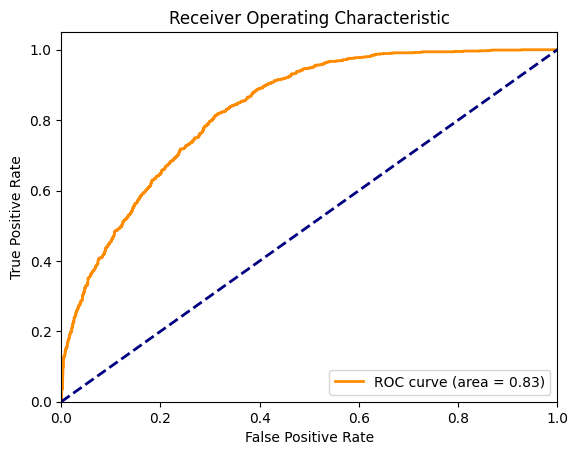

In [ ]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

# Get the probabilities for the positive class (adjust index if needed)
probs = predictions.predictions[:, 1]  # Assuming the second column is for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(predictions.label_ids, probs, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## Mean Pooling

In [ ]:
!unzip /content/bert_finetuned_model.zip -d "/content/"

Archive:  /content/bert_finetuned_model.zip
   creating: /content/content/bert_finetuned_model/
  inflating: /content/content/bert_finetuned_model/special_tokens_map.json  
  inflating: /content/content/bert_finetuned_model/config.json  
  inflating: /content/content/bert_finetuned_model/pytorch_model.bin  
  inflating: /content/content/bert_finetuned_model/tokenizer.json  
  inflating: /content/content/bert_finetuned_model/tokenizer_config.json  


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import numpy as np
from datasets import Dataset

model_path = './bert_finetuned_model'
tokenizer = AutoTokenizer.from_pretrained(model_path)
# Function to tokenize data
def tokenize_function(examples):
    return tokenizer(examples['Comment'], padding="max_length", truncation=True, max_length=128)

# Apply function to DataFrame and convert to Dataset
df_dataset = Dataset.from_pandas(df)
tokenized_df = df_dataset.map(tokenize_function, batched=True)
tokenized_df.set_format(type='torch', columns=['input_ids', 'attention_mask'])

model = AutoModelForSequenceClassification.from_pretrained(model_path, num_labels=5)


Didn't find file ./bert_finetuned_model/sentencepiece.bpe.model. We won't load it.
Didn't find file ./bert_finetuned_model/added_tokens.json. We won't load it.
loading file None
loading file ./bert_finetuned_model/tokenizer.json
loading file None
loading file ./bert_finetuned_model/special_tokens_map.json
loading file ./bert_finetuned_model/tokenizer_config.json


Map:   0%|          | 0/109554 [00:00<?, ? examples/s]

loading configuration file ./bert_finetuned_model/config.json
Model config BertConfig {
  "_name_or_path": "./bert_finetuned_model",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "relative_key",
  "problem_type": "single_label_classification",
  "torch_dtype": "float32",
  "transformers_version": "4.18.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "voca

In [ ]:
from transformers import BertModel, BertTokenizer, BertConfig
import torch
import numpy as np

# Assuming the model directory contains the model and tokenizer files
model_dir = "/content/bert_finetuned_model"

tokenizer = AutoTokenizer.from_pretrained(model_dir)
config = BertConfig.from_pretrained(model_dir, output_hidden_states=True)
model = AutoModelForSequenceClassification.from_pretrained(model_dir, config=config)
model.eval()

def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output.hidden_states[-1]  # Get the last layer hidden-state
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

def get_embeddings(texts, tokenizer, model, device='cpu', batch_size=8):
    model.to(device)
    embeddings = []

    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]
        encoded_inputs = tokenizer(batch_texts, return_tensors='pt', padding=True, truncation=True, max_length=512)
        encoded_inputs = {k: v.to(device) for k, v in encoded_inputs.items()}

        with torch.no_grad():
            outputs = model(**encoded_inputs)
            pooled_embeddings = mean_pooling(outputs, encoded_inputs['attention_mask'])
            embeddings.append(pooled_embeddings.cpu().numpy())

    return np.vstack(embeddings)



Didn't find file /content/bert_finetuned_model/sentencepiece.bpe.model. We won't load it.
Didn't find file /content/bert_finetuned_model/added_tokens.json. We won't load it.
loading file None
loading file /content/bert_finetuned_model/tokenizer.json
loading file None
loading file /content/bert_finetuned_model/special_tokens_map.json
loading file /content/bert_finetuned_model/tokenizer_config.json
loading configuration file /content/bert_finetuned_model/config.json
Model config BertConfig {
  "_name_or_path": "./bert_finetuned_model",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "

### 3.4 Model Deployment

In [ ]:
# Model and tokenizer path
model_path = './bert_finetuned_model'

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_path)

# Function to tokenize data
def tokenize_function(examples):
    return tokenizer(examples['Comment'], padding="max_length", truncation=True, max_length=128)

# Convert DataFrame to Dataset and apply tokenization
df_dataset = Dataset.from_pandas(df)
tokenized_df = df_dataset.map(tokenize_function, batched=True)
tokenized_df.set_format(type='torch', columns=['input_ids', 'attention_mask'])

Didn't find file ./bert_finetuned_model/sentencepiece.bpe.model. We won't load it.
Didn't find file ./bert_finetuned_model/added_tokens.json. We won't load it.
loading file None
loading file ./bert_finetuned_model/tokenizer.json
loading file None
loading file ./bert_finetuned_model/special_tokens_map.json
loading file ./bert_finetuned_model/tokenizer_config.json


Map:   0%|          | 0/109554 [00:00<?, ? examples/s]

In [ ]:
from transformers import AutoModelForSequenceClassification, BertConfig
import torch
import numpy as np

# Load the model with configuration to output hidden states
config = BertConfig.from_pretrained(model_path, output_hidden_states=True)
model = AutoModelForSequenceClassification.from_pretrained(model_path, config=config)
model.eval()

# Function to perform mean pooling on hidden states
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output.hidden_states[-1]  # Get the last layer hidden-state
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
    sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
    return sum_embeddings / sum_mask

# Function to compute embeddings
def get_embeddings(texts, tokenizer, model, device='cpu', batch_size=8):
    model.to(device)
    embeddings = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]
        encoded_inputs = tokenizer(batch_texts, return_tensors='pt', padding=True, truncation=True, max_length=512)
        encoded_inputs = {k: v.to(device) for k, v in encoded_inputs.items()}
        with torch.no_grad():
            outputs = model(**encoded_inputs)
            pooled_embeddings = mean_pooling(outputs, encoded_inputs['attention_mask'])
            embeddings.append(pooled_embeddings.cpu().numpy())
    return np.vstack(embeddings)

loading configuration file ./bert_finetuned_model/config.json
Model config BertConfig {
  "_name_or_path": "./bert_finetuned_model",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_hidden_states": true,
  "pad_token_id": 0,
  "position_embedding_type": "relative_key",
  "problem_type": "single_label_classification",
  "torch_dtype": "float32",
  "transformers_version": "4.18.0",
  "type_vocab_size":

In [ ]:
import pandas as pd

# Example usage in deployment
actual_comment_df = df['Cleaned_Comment'].tolist()  # Ensure df is defined and has 'Cleaned_Comment'
comment_embeddings = get_embeddings(actual_comment_df, tokenizer, model, device='cpu')

In [ ]:
df['embeddings'] = comment_embeddings.tolist()
df

Comment             Author  \
0       Fun fact, UCLA D was ranked #2 in KenPom when ...         versusChou   
1       Well, it was a season to be proud of regardles...    ZombieLoveChild   
2       Yeah and this is why I have UCLA in my F4 yet ...     StephenBrocker   
3       So while getting our backs blown out on nation...    ZombieLoveChild   
4       We are at commercial break so its time for eve...  WelcomeToBoshwitz   
...                                                   ...                ...   
109551  😂🤣😁 YEAH BUDDY []_[] Pandemonium.\n\nEven that...         MiamiPower   
109552     That'd be something, but I think they got this           TechSudz   
109553        Well I am sorry Mike Woodson is your coach.         LastPhoton   
109554  A quick glance at your post history tells me y...      DanMarino1313   
109555                                          He is ass          [deleted]   

                Created UTC  \
0       2023-03-17 02:25:35   
1       2023-03-17 04:09:18   
2       2023-03-17 02:16:17   
3       2023-03-17 03:44:35   
4       2023-03-17 02:46:48   
...                     ...   
109551  2023-03-21 02:26:15   
109552  2023-03-20 02:48:53   
109553  2023-03-20 03:11:32   
109554  2023-03-20 13:30:54   
109555  2023-03-20 03:15:03   

                                                     game  \
0       game_thread_15_unc_asheville_2_ucla_2205_pm_et...   
1       game_thread_15_unc_asheville_2_ucla_2205_pm_et...   
2       game_thread_15_unc_asheville_2_ucla_2205_pm_et...   
3       game_thread_15_unc_asheville_2_ucla_2205_pm_et...   
4       game_thread_15_unc_asheville_2_ucla_2205_pm_et...   
...                                                   ...   
109551       game_thread_5_miami_4_indiana_2040_pm_et.csv   
109552       game_thread_5_miami_4_indiana_2040_pm_et.csv   
109553       game_thread_5_miami_4_indiana_2040_pm_et.csv   
109554       game_thread_5_miami_4_indiana_2040_pm_et.csv   
109555       game_thread_5_miami_4_indiana_2040_pm_et.csv   

                                          Cleaned_Comment  \
0       fun fact ucla ranked kenpom jaylen clark went ...   
1       well season proud regardless thanks everyone t...   
2       yeah ucla f yet always bet team experience tak...   
3       getting back blown national tv time look uclas...   
4       commercial break time everyone unite making fu...   
...                                                   ...   
109551  yeah buddy _ pandemonium even probably underst...   
109552                                something think got   
109553                      well sorry mike woodson coach   
109554  quick glance post history tell went maryland s...   
109555                                                 as   

                                            lower_comment        team  \
0       fun fact, ucla d was ranked #2 in kenpom when ...         NaN   
1       well, it was a season to be proud of regardles...         NaN   
2       yeah and this is why i have ucla in my f4 yet ...         NaN   
3       so while getting our backs blown out on nation...         NaN   
4       we are at commercial break so its time for eve...         NaN   
...                                                   ...         ...   
109551  😂🤣😁 yeah buddy []_[] pandemonium.\n\neven that...  hurricanes   
109552     that'd be something, but i think they got this         NaN   
109553        well i am sorry mike woodson is your coach.         NaN   
109554  a quick glance at your post history tells me y...         NaN   
109555                                          he is ass         NaN   

                                               embeddings  
0       [-0.07647200673818588, 0.6112145781517029, 0.3...  
1       [0.5271478891372681, 0.21096773445606232, 0.38...  
2       [0.21848616003990173, 0.35012397170066833, 0.2...  
3       [0.31525394320487976, 1.1018977165222168, 1.30...  
4       [0.41143572330474854, 0.16390101611614227, -0....  
...          

In [ ]:
from torch.utils.data import Dataset, DataLoader

# Mock dataset class to handle embeddings
class EmbeddingDataset(Dataset):
    def __init__(self, embeddings):
        self.embeddings = embeddings

    def __len__(self):
        return len(self.embeddings)

    def __getitem__(self, idx):
        # Ensure that each embedding is wrapped in a tensor
        return {'input_ids': torch.tensor(self.embeddings[idx])}

# Assuming df['Embeddings'] contains the embeddings
embeddings = np.stack(df['embeddings'].values)  # Ensure embeddings are correctly shaped numpy arrays
dataset = EmbeddingDataset(embeddings)

# Prepare DataLoader for batch processing
loader = DataLoader(dataset, batch_size=16, shuffle=False)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
              (distance_embedding): Embedding(1023, 64)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path, config=config)
model.eval()

# Load embeddings and adjust dimensions
embeddings = torch.tensor(df['embeddings'].tolist())  # Assume this loads your [109554, 768] tensor

# Reshape embeddings to include sequence length of 1
embeddings = embeddings.unsqueeze(1)  # Reshape to [109554, 1, 768]

# Move embeddings to the appropriate device (e.g., CUDA if using GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
embeddings = embeddings.to(device)
model = model.to(device)

# Predict using the embeddings
with torch.no_grad():
    outputs = model(inputs_embeds=embeddings)  # Use inputs_embeds for direct embedding input
    preds = torch.argmax(outputs.logits, dim=1)

# Convert predictions to numpy for easier processing
predicted_labels = preds.cpu().numpy()

# Optionally convert numerical labels back to sentiment labels if you have the mapping
label_names = ['Negative', 'Somewhat Negative', 'Neutral', 'Somewhat Positive', 'Positive']
predicted_sentiments = [label_names[label] for label in predicted_labels]

# Store predictions back in DataFrame
df['Predicted Sentiment'] = predicted_labels

Didn't find file ./bert_finetuned_model/sentencepiece.bpe.model. We won't load it.
Didn't find file ./bert_finetuned_model/added_tokens.json. We won't load it.
loading file None
loading file ./bert_finetuned_model/tokenizer.json
loading file None
loading file ./bert_finetuned_model/special_tokens_map.json
loading file ./bert_finetuned_model/tokenizer_config.json
loading weights file ./bert_finetuned_model/pytorch_model.bin
All model checkpoint weights were used when initializing BertForSequenceClassification.

All the weights of BertForSequenceClassification were initialized from the model checkpoint at ./bert_finetuned_model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use BertForSequenceClassification for predictions without further training.


OutOfMemoryError: CUDA out of memory. Tried to allocate 322.00 MiB. GPU 0 has a total capacity of 14.75 GiB of which 237.06 MiB is free. Process 352474 has 14.51 GiB memory in use. Of the allocated memory 14.31 GiB is allocated by PyTorch, and 78.95 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
df['Predicted Sentiment'] = df.apply(lambda row: -2 if row['Predicted Sentiment'] == "Negative"
                                     else -1 if row['Predicted Sentiment'] == "Somewhat Negative"
                                     else 0 if row['Predicted Sentiment'] == "Neutral"
                                     else 1 if row['Predicted Sentiment'] == "Somewhat Positive"
                                     else 2 if row['Predicted Sentiment'] == "Positive"
                                     else 'Unknown', axis=1)
df

Comment             Author  \
0       Fun fact, UCLA D was ranked #2 in KenPom when ...         versusChou   
1       Well, it was a season to be proud of regardles...    ZombieLoveChild   
2       Yeah and this is why I have UCLA in my F4 yet ...     StephenBrocker   
3       So while getting our backs blown out on nation...    ZombieLoveChild   
4       We are at commercial break so its time for eve...  WelcomeToBoshwitz   
...                                                   ...                ...   
109551  😂🤣😁 YEAH BUDDY []_[] Pandemonium.\n\nEven that...         MiamiPower   
109552     That'd be something, but I think they got this           TechSudz   
109553        Well I am sorry Mike Woodson is your coach.         LastPhoton   
109554  A quick glance at your post history tells me y...      DanMarino1313   
109555                                          He is ass          [deleted]   

                Created UTC  \
0       2023-03-17 02:25:35   
1       2023-03-17 04:09:18   
2       2023-03-17 02:16:17   
3       2023-03-17 03:44:35   
4       2023-03-17 02:46:48   
...                     ...   
109551  2023-03-21 02:26:15   
109552  2023-03-20 02:48:53   
109553  2023-03-20 03:11:32   
109554  2023-03-20 13:30:54   
109555  2023-03-20 03:15:03   

                                                     game  \
0       game_thread_15_unc_asheville_2_ucla_2205_pm_et...   
1       game_thread_15_unc_asheville_2_ucla_2205_pm_et...   
2       game_thread_15_unc_asheville_2_ucla_2205_pm_et...   
3       game_thread_15_unc_asheville_2_ucla_2205_pm_et...   
4       game_thread_15_unc_asheville_2_ucla_2205_pm_et...   
...                                                   ...   
109551       game_thread_5_miami_4_indiana_2040_pm_et.csv   
109552       game_thread_5_miami_4_indiana_2040_pm_et.csv   
109553       game_thread_5_miami_4_indiana_2040_pm_et.csv   
109554       game_thread_5_miami_4_indiana_2040_pm_et.csv   
109555       game_thread_5_miami_4_indiana_2040_pm_et.csv   

                                          Cleaned_Comment  \
0       fun fact ucla ranked kenpom jaylen clark went ...   
1       well season proud regardless thanks everyone t...   
2       yeah ucla f yet always bet team experience tak...   
3       getting back blown national tv time look uclas...   
4       commercial break time everyone unite making fu...   
...                                                   ...   
109551  yeah buddy _ pandemonium even probably underst...   
109552                                something think got   
109553                      well sorry mike woodson coach   
109554  quick glance post history tell went maryland s...   
109555                                                 as   

                                            lower_comment        team  \
0       fun fact, ucla d was ranked #2 in kenpom when ...         NaN   
1       well, it was a season to be proud of regardles...         NaN   
2       yeah and this is why i have ucla in my f4 yet ...         NaN   
3       so while getting our backs blown out on nation...         NaN   
4       we are at commercial break so its time for eve...         NaN   
...                                                   ...         ...   
109551  😂🤣😁 yeah buddy []_[] pandemonium.\n\neven that...  hurricanes   
109552     that'd be something, but i think they got this         NaN   
109553        well i am sorry mike woodson is your coach.         NaN   
109554  a quick glance at your post history tells me y...         NaN   
109555                                          he is ass         NaN   

                                               embeddings  Predicted Sentiment  
0       [-0.07647200673818588, 0.6112145781517029, 0.3...                   -1  
1       [0.5271478891372681, 0.21096773445606232, 0.38...                    1  
2       [0.21848616003990173, 0.35012397170066833, 0.2...                   -1  
3       [0.31525394320487976, 1.1018977165222168,

In [ ]:
df[['Comment','Author','Created UTC','Predicted Sentiment']].to_csv('output.csv', index=False)